# 1. Preprocessing Data

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [110]:
file_path = r"C:\Users\Darryl\Documents\File Materi Binus\BOOTCAMP DATA ANALYTICS BINUS\Capston Data Analitycs\online_retail(in).csv"
df = pd.read_csv(file_path)

In [177]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [175]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [116]:
df.drop(columns=["index"], inplace=True)

In [120]:
df_cleaned = df.dropna(subset=["CustomerID"])

In [122]:
df_cleaned.loc[:, "InvoiceDate"] = pd.to_datetime(df_cleaned["InvoiceDate"])
df_cleaned = df_cleaned[(df_cleaned["Quantity"] > 0) & (df_cleaned["UnitPrice"] > 0)]
df_cleaned.loc[:, "TotalPrice"] = df_cleaned["Quantity"] * df_cleaned["UnitPrice"]

In [124]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 397884 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    397884 non-null  object 
 1   StockCode    397884 non-null  object 
 2   Description  397884 non-null  object 
 3   Quantity     397884 non-null  int64  
 4   InvoiceDate  397884 non-null  object 
 5   UnitPrice    397884 non-null  float64
 6   CustomerID   397884 non-null  float64
 7   Country      397884 non-null  object 
 8   TotalPrice   397884 non-null  float64
dtypes: float64(3), int64(1), object(5)
memory usage: 30.4+ MB


# 2. Analisis Eksploratif dan Statistik Deskriptif

In [126]:
print(df_cleaned.describe())

            Quantity      UnitPrice     CustomerID     TotalPrice
count  397884.000000  397884.000000  397884.000000  397884.000000
mean       12.988238       3.116488   15294.423453      22.397000
std       179.331775      22.097877    1713.141560     309.071041
min         1.000000       0.001000   12346.000000       0.001000
25%         2.000000       1.250000   13969.000000       4.680000
50%         6.000000       1.950000   15159.000000      11.800000
75%        12.000000       3.750000   16795.000000      19.800000
max     80995.000000    8142.750000   18287.000000  168469.600000


In [45]:
plt.figure()

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Axes: xlabel='TotalPrice', ylabel='Count'>

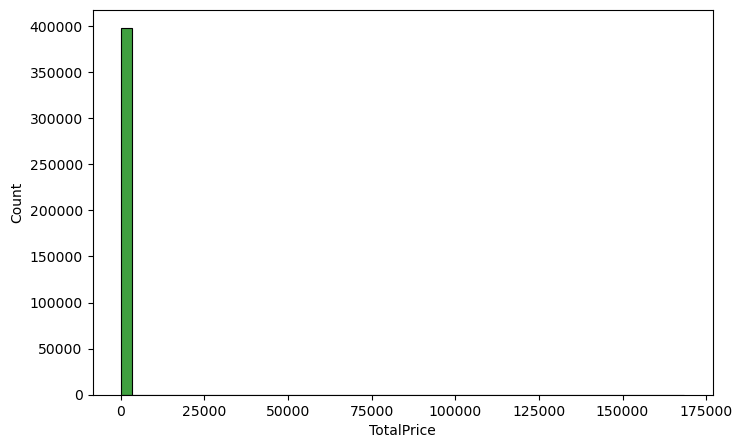

In [128]:
plt.figure(figsize=(8, 5))
sns.histplot(df_cleaned["TotalPrice"], bins=50, color="green")

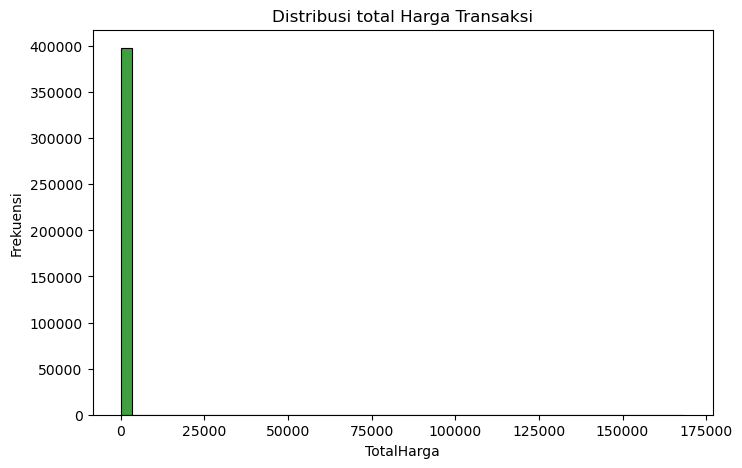

In [130]:
plt.figure(figsize=(8, 5))
sns.histplot(df_cleaned["TotalPrice"], bins=50, color="green")
plt.title("Distribusi total Harga Transaksi")
plt.xlabel("TotalHarga")
plt.ylabel("Frekuensi")
plt.show()

# 3. Visualisasi Data

In [132]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [142]:
# a. Tren Penjualan
df_cleaned["InvoiceDate"] = pd.to_datetime(df_cleaned["InvoiceDate"], errors='coerce')
print(df_cleaned["InvoiceDate"].dtype)
df_cleaned["YearMonth"] = df_cleaned["InvoiceDate"].dt.to_period("M")
sales_trend = df_cleaned.groupby("YearMonth")["TotalPrice"].sum()

datetime64[ns]


In [144]:
plt.figure()

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

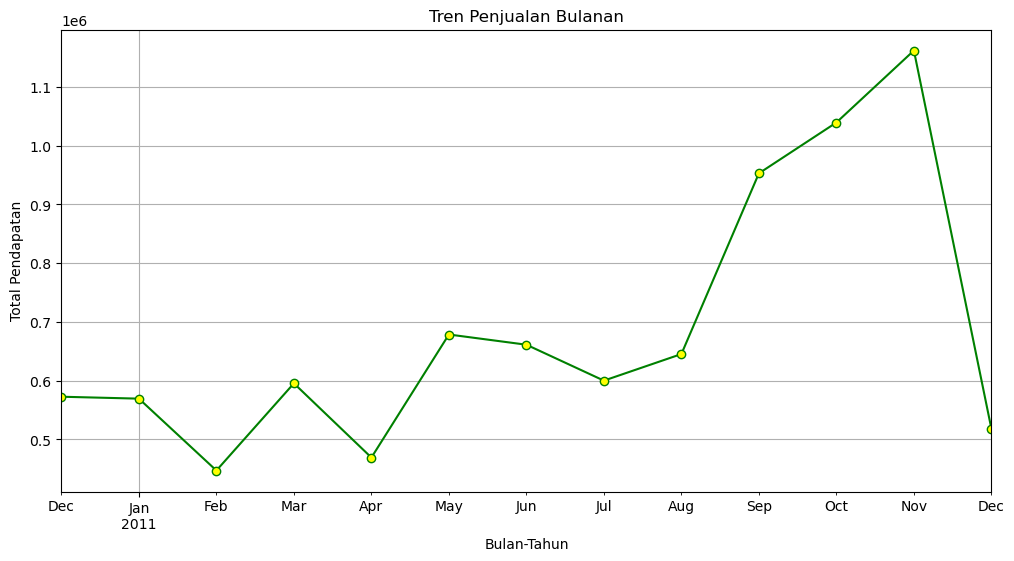

In [146]:
plt.figure(figsize=(12, 6))
sales_trend.plot(kind="line", marker="o", color="green", markerfacecolor="yellow")
plt.title("Tren Penjualan Bulanan")
plt.xlabel("Bulan-Tahun")
plt.ylabel("Total Pendapatan")
plt.grid(True)
plt.show()

In [150]:
# b. Distribusi Berdasarkan Negara
sales_by_country = df_cleaned.groupby("Country")["TotalPrice"].sum().sort_values(ascending=False).head(20)

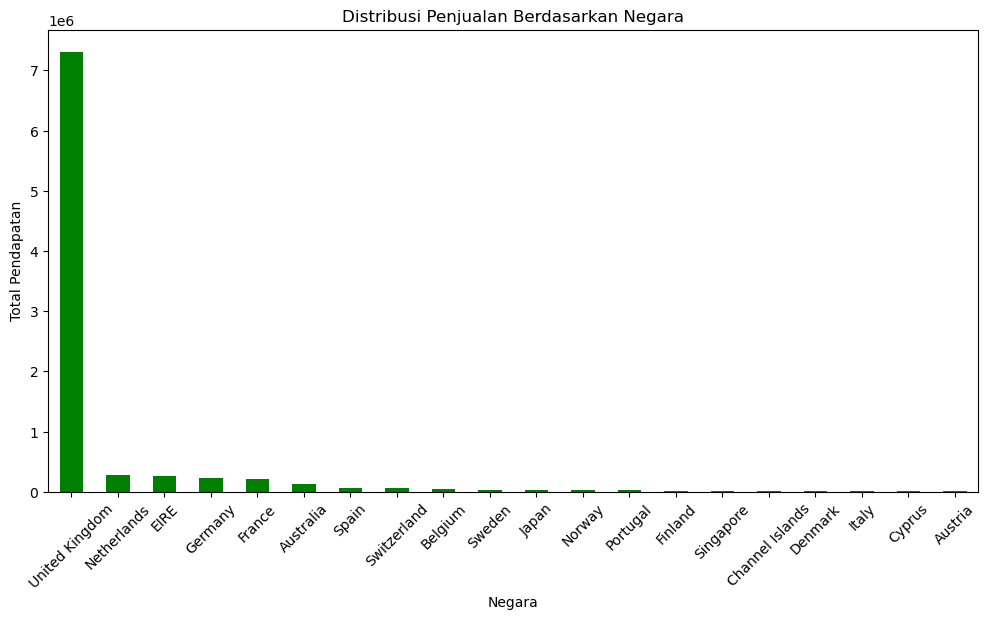

In [152]:
plt.figure(figsize=(12, 6))
sales_by_country.plot(kind="bar", color="green")
plt.title("Distribusi Penjualan Berdasarkan Negara")
plt.xlabel("Negara")
plt.ylabel("Total Pendapatan")
plt.xticks(rotation=45)
plt.show()

In [154]:
# c. Analisis Produk

# Produk Terlaris di Pasaran
top_products = df_cleaned.groupby("Description")["Quantity"].sum().sort_values(ascending=False).head(20)

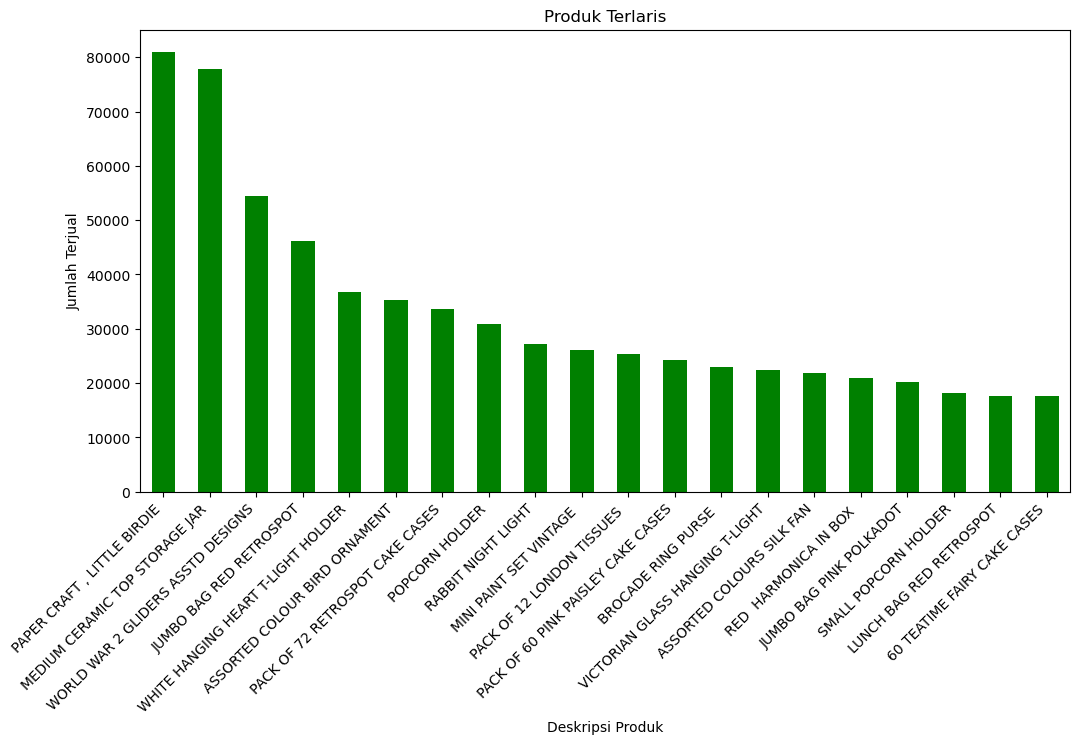

In [156]:
plt.figure(figsize=(12, 6))
top_products.plot(kind="bar", color="green")
plt.title("Produk Terlaris")
plt.xlabel("Deskripsi Produk")
plt.ylabel("Jumlah Terjual")
plt.xticks(rotation=45, ha="right")
plt.show()

In [158]:
# Produk Kurang Laris di Pasaran
least_products = df_cleaned.groupby("Description")["Quantity"].sum().sort_values(ascending=True).head(20)

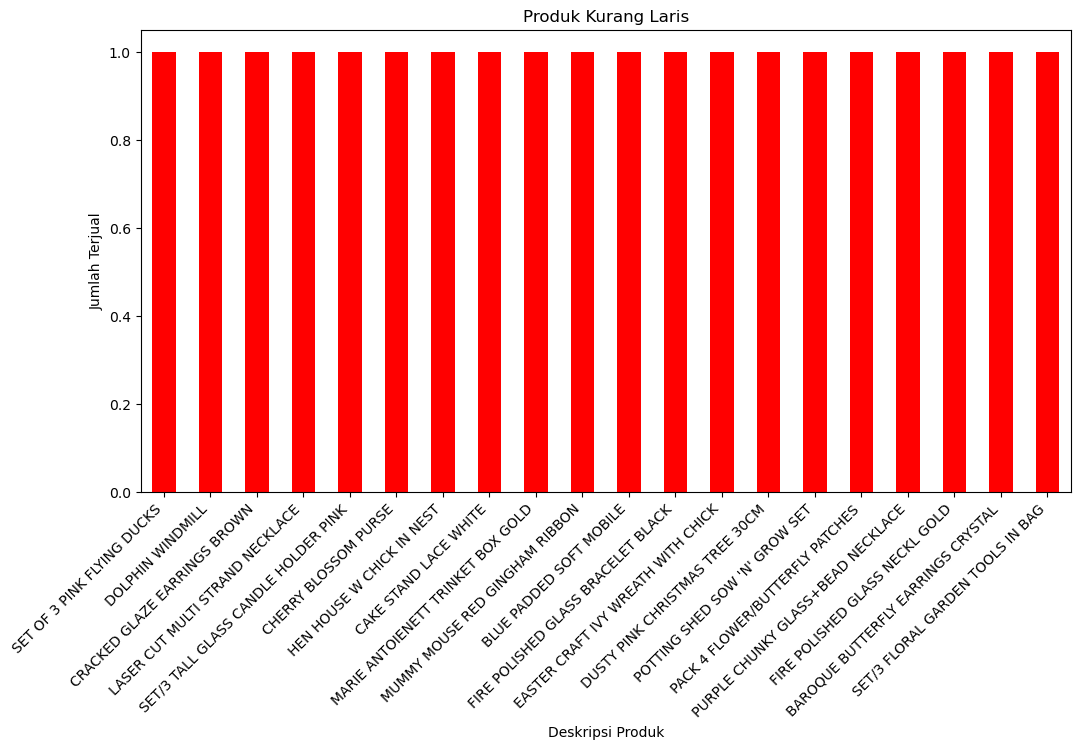

In [160]:
plt.figure(figsize=(12, 6))
least_products.plot(kind="bar", color="red")
plt.title("Produk Kurang Laris")
plt.xlabel("Deskripsi Produk")
plt.ylabel("Jumlah Terjual")
plt.xticks(rotation=45, ha="right")
plt.show()

In [162]:
# d. Analisis Pelanggan
customer_by_country = df_cleaned.groupby("Country")["CustomerID"].nunique().sort_values(ascending=False).head(20)

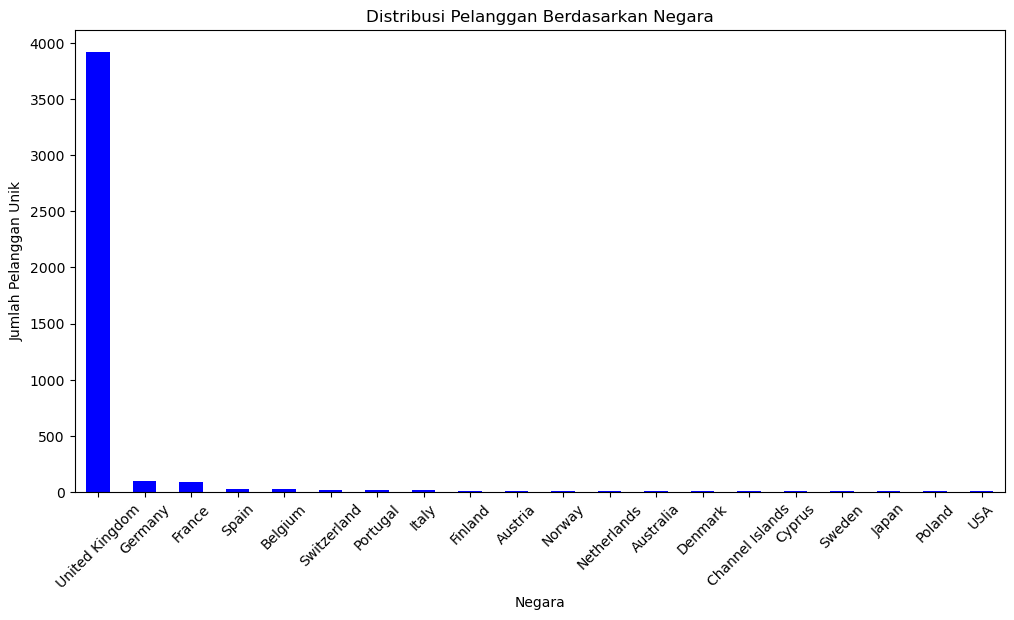

In [164]:
plt.figure(figsize=(12, 6))
customer_by_country.plot(kind="bar", color="blue")
plt.title("Distribusi Pelanggan Berdasarkan Negara")
plt.xlabel("Negara")
plt.ylabel("Jumlah Pelanggan Unik")
plt.xticks(rotation=45)
plt.show()

In [166]:
# Pelanggan Berdasarkan Pengeluaran
customer_analysis = df_cleaned.groupby("CustomerID")["TotalPrice"].sum().sort_values(ascending=False).head(20)

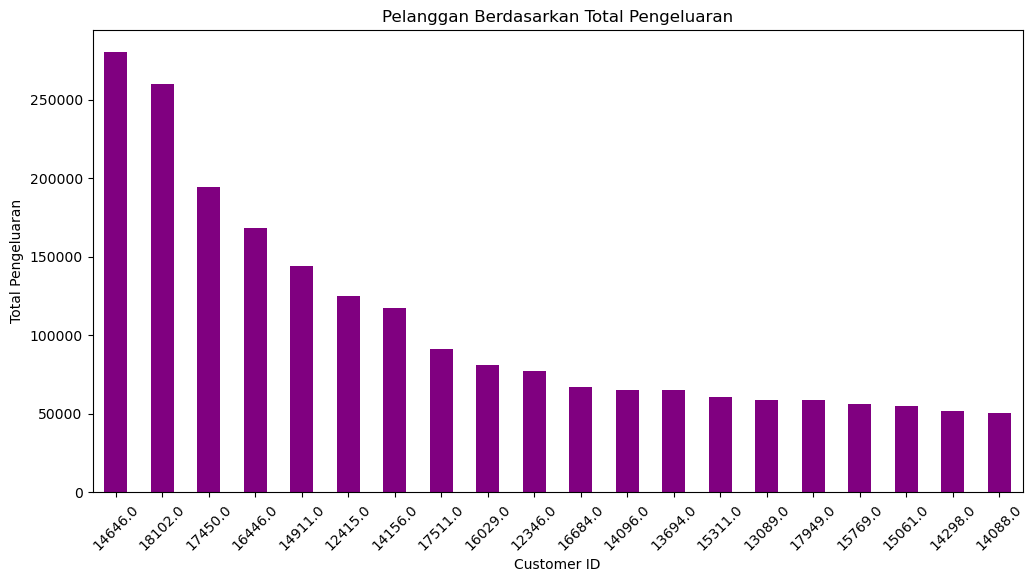

In [168]:
plt.figure(figsize=(12, 6))
customer_analysis.plot(kind="bar", color="purple")
plt.title("Pelanggan Berdasarkan Total Pengeluaran")
plt.xlabel("Customer ID")
plt.ylabel("Total Pengeluaran")
plt.xticks(rotation=45)
plt.show()

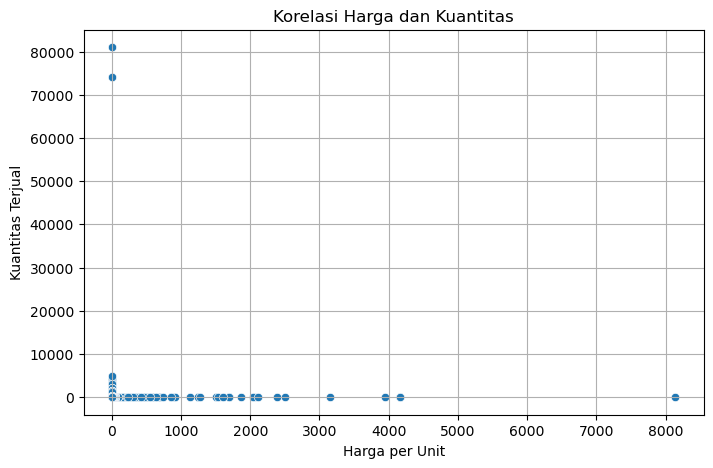

In [172]:
# e. Korelasi dan Hubungan
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df_cleaned, x="UnitPrice", y="Quantity", alpha=1)
plt.title("Korelasi Harga dan Kuantitas")
plt.xlabel("Harga per Unit")
plt.ylabel("Kuantitas Terjual")
plt.grid(True)
plt.show()